# TIME SERIES ANALYSIS FOR REAL EASTATE PRICE PREDICITON

* Author: Joan Kabura Njoroge
* Mentor: Mark Tiba


# INTRODUCTION
This is a project for FlatIron Data Science course Phase 4

# BUSINESS UNDERSTANDING
Real Estate investors have chosen to consult the services of Real Estate InvestmentAI to help predict the more profitable areas to invest in properties found in over 14,000 zipcodes in the United States. The aim is to choose the zipcode areas with the highest Return On Investment(ROI) and to forecast f
uture prices in the areas with the highest ROI.

This project aims to utilize a Time Series Model to forecast the prices of properties in various zipcodes in U.S.


# DATA
The data is obtained from the [Zillow Research Data](https://www.zillow.com/research/data/). It represents the median monthly property prices for 14,723 zipcode area in the United States of the period April 1996 to April 2018

# DATA UNDERSRTANDING
This dataset represents the median monthly home sales prices for 265 zip codes from April 1996 to April 2018 according to Zillow statistics.
A distinct zip code is represented by each row. Each record includes area details and monthly median sales prices for homes.
There are 14,723 rows and 272 variables:

* `RegionID`: Unique index, 58196 through 753844
* `RegionName`: Unique Zip Code, 1001 through 99901
* `City`: City in which the zip code is located
* `State`: State in which the zip code is located
* `Metro`: Metropolitan Area in which the zip code is located
* `CountyName`: County in which the zip code is located
* `SizeRank`: Numerical rank of size of zip code, ranked 1 through 14723
* `1996-04 through 2018-04`: refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code

# IMPORTING LIBRARIES

In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from statsmodels.tsa.stattools import adfuller
from datetime import datetime

from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# set visualization defaults
font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (15, 8)

# READING THE DATASETS
pd.set_option("display.max_columns", None)
zillow_df = pd.read_csv('data/zillow_data.csv')
zillow_df.head()


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

In [97]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [98]:
# Check for missing values
zillow_df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

We can see that the `Metro` column has many missing values. Further investigation may be necessary to learn to deal with this column.

# DATA CLEANING AND EXPLORATION
The initial step is to investigate each column. 
1. Analyzing the `RegionID` column which is the unique indices.

In [99]:
print(f"Count of unique entries", zillow_df.RegionID.value_counts())
print(f"Number of Unique values", zillow_df.RegionID.nunique())

Count of unique entries 73724     1
70551     1
99221     1
76688     1
82829     1
         ..
71176     1
91654     1
65029     1
100380    1
98304     1
Name: RegionID, Length: 14723, dtype: int64
Number of Unique values 14723


We can see that each entry is unique values maybe describing the different zipcodes of the properties. It would thus be necessary to change this value to a string data type.

In [100]:
# zillow_df.RegionID = zillow_df.RegionID.astype('string')

2. Analyzing `Region Name` column: 
Unique Zip Code, 1001 through 99901 it would be necessary to cast to string to change these to the actual zipcode between 1001 and 99901

In [101]:
print(f"Count of unique entries", zillow_df.RegionName.value_counts())
print(f"Number of Unique values", zillow_df.RegionName.nunique())

Count of unique entries 55324    1
74561    1
73538    1
31546    1
82070    1
        ..
75182    1
55343    1
1450     1
73129    1
65536    1
Name: RegionName, Length: 14723, dtype: int64
Number of Unique values 14723


In [102]:
# change the region name to the appropriate zipcodes between 1001 to 99901
zillow_df.RegionName = zillow_df.RegionName.astype('string')
for i in range(len(zillow_df)):
    zillow_df.RegionName[i] = zillow_df.RegionName[i].rjust(5, '0')

# change back to integer asthis would be used to determine the zipcodes
zillow_df.RegionName = zillow_df.RegionName.astype('int')

# view if the zipcodes changed tot the actual zipcodes
zillow_df[['RegionName', 'State']].sort_values(by=['RegionName'])


,RegionName,State
5850,1001,MA
4199,1002,MA
11213,1005,MA
6850,1007,MA
14547,1008,MA
...,...,...
4526,99709,AK
8438,99712,AK
4106,99801,AK
8658,99835,AK


We can see that the `RegionName` column has been change to the unique codes of the different regions/ ststes between 01001 to 99901. This would be necessary to know the area and more about the `Region Name` and match to the various regions.

3. Analyzing `City` column which refers the city in which the zip code is located. It may be useful in getting the zipcode region name.

In [103]:
# There are 7554 unique values.
zillow_df.City.nunique()

7554

4. Analyzing `State` column

In [104]:
print(f"Count of unique entries", zillow_df.State.value_counts())
print(" ")
print(f"Number of Unique values", zillow_df.State.nunique())

Count of unique entries CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
WY      31
ND      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64
 
Number of Unique values 51


5. Analyzing the `Metro` column which is the Metropolitan Area in which the zip code is located. 
Initial data exploration showed the presence of 1043 NaN values. It maybe be best to deal with these. Most probable appraoch would be to fill these with None meaning that there is no Metropolitan Area in the given zipcode. Perharps the presence of a Metrpolitan Area has an infleunce on the value of the properties.

In [105]:
# Deal with missing values
zillow_df.Metro.fillna('None', inplace=True)

In [106]:
print(f"Count of unique entries", zillow_df.Metro.value_counts())
print(f"Number of Unique values", zillow_df.Metro.nunique())


Count of unique entries None                              1043
New York                           779
Los Angeles-Long Beach-Anaheim     347
Chicago                            325
Philadelphia                       281
                                  ... 
Vernal                               1
Wahpeton                             1
North Platte                         1
Kingsville                           1
Deming                               1
Name: Metro, Length: 702, dtype: int64
Number of Unique values 702


5. Analyzing the sales columns in the columns `1996-04 through 2018-04`.  which refers to the median housing sales values for April 1996 through April 2018, that is 265 data points of monthly data for each zip code.
This column is important in choosing the ROI yield.

The presence of NaN values in some of columns can make the model assume that the there were no sales in the zipcodes at those period. Which can be an incorrect assumption.

The period from 1996-04 to 2018-04 is a 22 year period maybe selecting different periods i.e 4 year median sales value, average median sales, 1 year median sales values.

# AGGREGATION OF ROI

In [107]:
# Create a column calcualting the ROI for a 1 year period.
zillow_df['1_yr_ROI'] = (zillow_df['2018-04'] - zillow_df['2017-04'])/(zillow_df['2017-04'])
zillow_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,1_yr_ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,

In [108]:
# Create a column calcualting the ROI for a 5 year period.
zillow_df['5_yr_ROI'] = (zillow_df['2018-04'] - zillow_df['2013-04'])/(zillow_df['2014-07'])
zillow_df


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,1_yr_ROI,5_yr_ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,

In [109]:
# Create a column calcualting the ROI for a 10 year period.

zillow_df['10_yr_ROI'] = (zillow_df['2018-04'] - zillow_df['2008-04'])/(zillow_df['2008-04'])
zillow_df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,1_yr_ROI,5_yr_ROI,10_yr_ROI
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0

It may be necessary aggregate data over afew year to be able to look at differences between periods. Fluctaitions [2009 housing market crash](https://en.wikipedia.org/wiki/Global_financial_crisis_in_2009#:~:text=By%20March%209%2C%202009%2C%20the,8%2C500%20by%20May%206%2C%202009.) during the Great Depression.
We will use the ROI over the chosen period to get the zipcodes to get a comparison for highest upward trends.

In [110]:
# Highest values
zillow_df.sort_values('1_yr_ROI',ascending=False).head()[['RegionName','City','State','1_yr_ROI']]

,RegionName,City,State,1_yr_ROI
4211,7106,Newark,NJ,0.508078
13409,27980,Hertford,NC,0.474385
3285,19601,Reading,PA,0.437500
3540,7103,Newark,NJ,0.435213
4309,29405,North Charleston,SC,0.431034


In [111]:
# Highest values areas in the most recent 5 years
zillow_df.sort_values('5_yr_ROI',ascending=False).head()[['RegionName','City','State','5_yr_ROI']]

,RegionName,City,State,5_yr_ROI
6563,15201,Pittsburgh,PA,1.347985
6105,37210,Nashville,TN,1.305582
7302,80216,Denver,CO,1.287557
1835,37207,Nashville,TN,1.241164
4554,33805,Lakeland,FL,1.237473


In [112]:
# Highest values in the most recent 10 years
zillow_df.sort_values('10_yr_ROI',ascending=False).head()[['RegionName','City','State','10_yr_ROI']]

,RegionName,City,State,10_yr_ROI
6563,15201,Pittsburgh,PA,1.664748
2580,94043,Mountain View,CA,1.601103
1155,11222,New York,NY,1.576111
5738,94301,Palo Alto,CA,1.564752
2452,58801,Williston,ND,1.559456


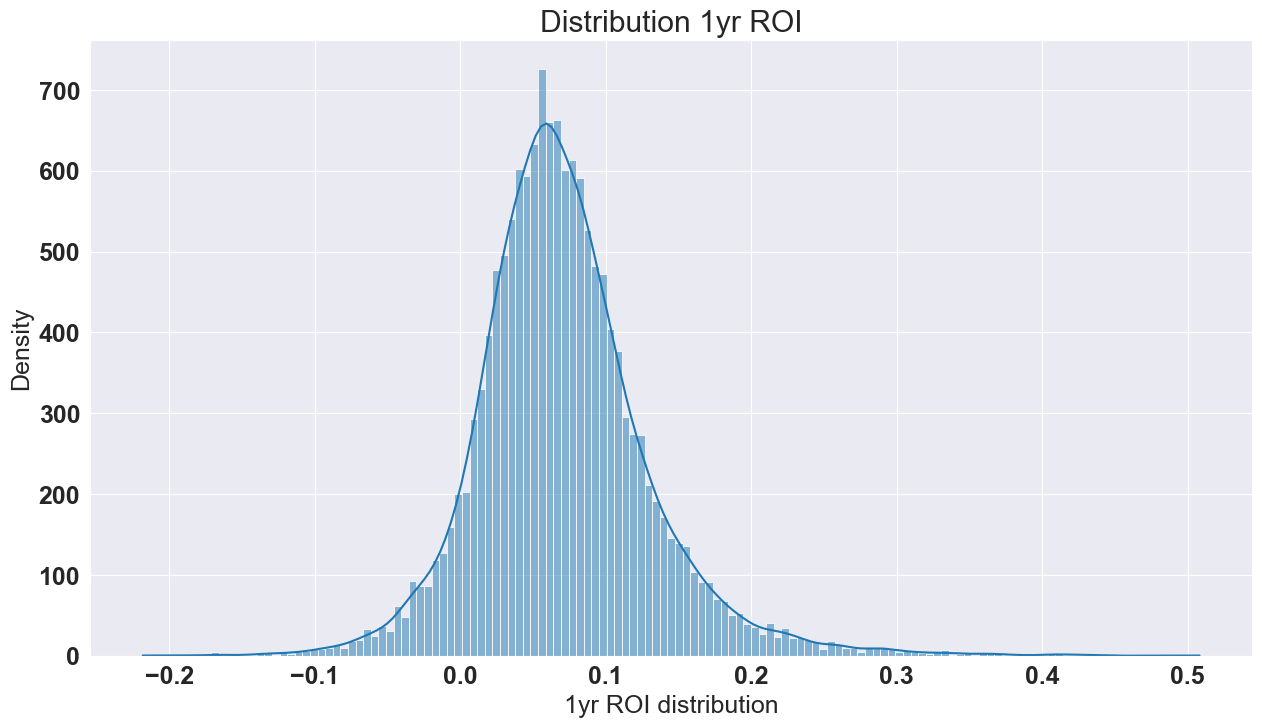

In [113]:
# distribtuion of 5 year ROI period
sns.histplot(zillow_df['1_yr_ROI'],kde=True)
plt.title('Distribution 1yr ROI')
plt.ylabel('Density')
plt.xlabel('1yr ROI distribution')
plt.savefig('visualizations/1_yr_ROI')
plt.show()

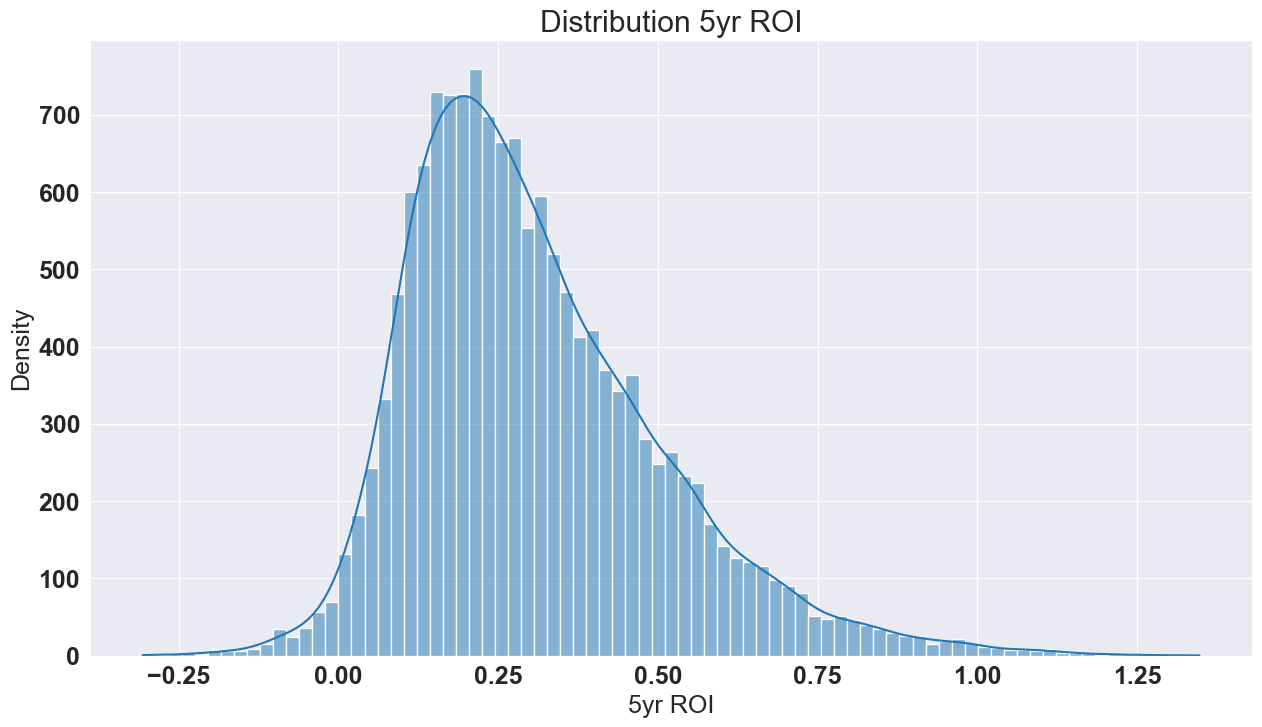

In [114]:
# distribtuion of 5 year ROI period
sns.histplot(zillow_df['5_yr_ROI'],kde=True)
plt.title('Distribution 5yr ROI')
plt.ylabel('Density')
plt.xlabel('5yr ROI')
plt.savefig('visualizations/5_yr_ROI')
plt.show()

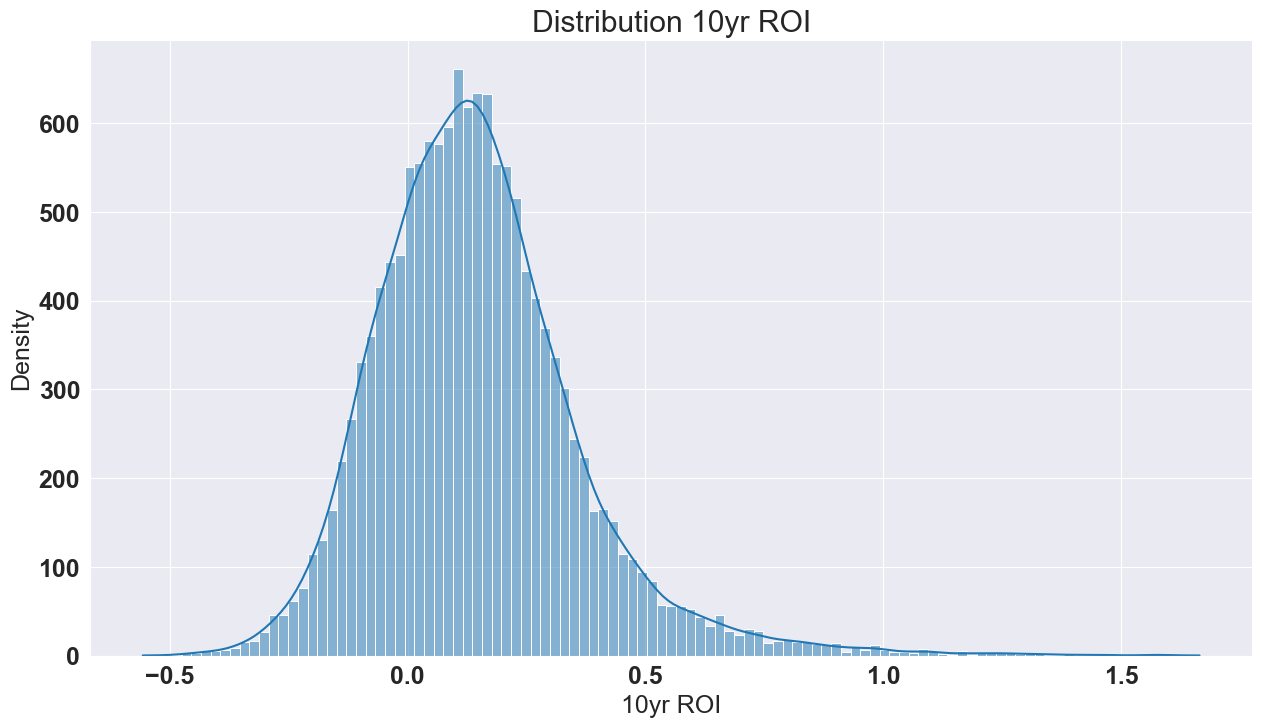

In [115]:
# distribtuion of 5 year ROI period
sns.histplot(zillow_df['10_yr_ROI'],kde=True)
plt.title('Distribution 10yr ROI')
plt.ylabel('Density')
plt.xlabel('10yr ROI')
plt.savefig('visualizations/10_yr_ROI')
plt.show()

Comparing the different periods we can see the most profitable areas has been changing showing that there maybe be various factors that changed in the various aspects like infrastructure in the areas (developent of a Metropoilitan Area), changes in the sizes of houses, e.t.c.

It is also important to keep in mind that there was a housing market crash in 2009 and expect to see this refelected in consequemt analysis. As the project is to assess short term investment opportunities and the other factors discussed. As such we will focus on more recent years for the analysis.

We will look more closely at these areas as zipcodes. We can also see the New York Area has been dropped out of the most profitable zipcodes in the recent year. This is can be due to maximum urbanization thus less development of peoperties and/ or deterioration of the area with overcrowding.

So we will choose to work with the average over a 3 year period to compare areas that demonstrate and upward trend taking into account of the 2009 market crash and changes that may hvae happened in the zipcodes in the most recent year.

In [116]:
# Find avg ROI over past 3 years
def average_one_year_ROI(df):
    average_one_year_ROI = []
    for i in range(len(df)):
        year_1_ROI = df['1_yr_ROI'][i]
        year_2_ROI = (df.iloc[i,-3] - df.iloc[i,-27])/df.iloc[i,-27]
        year_3_ROI = (df.iloc[i,-27] - df.iloc[i,-39])/df.iloc[i,-39]
        avg_ROI = (year_1_ROI + year_2_ROI + year_3_ROI)/3
        average_one_year_ROI.append(avg_ROI)
    return average_one_year_ROI 

zillow_df['avg_1_yr_ROI'] = average_one_year_ROI(zillow_df)

# Highest values
zillow_df.sort_values('avg_1_yr_ROI', ascending=False).head()[['RegionID', 'RegionName','City','State','1_yr_ROI', 'avg_1_yr_ROI']]

,RegionID,RegionName,City,State,1_yr_ROI,avg_1_yr_ROI
842,70817,30032,Candler-Mcafee,GA,0.409751,-0.102906
13409,69649,27980,Hertford,NC,0.474385,-0.107620
4211,60610,7106,Newark,NJ,0.508078,-0.109656
466,65801,19134,Philadelphia,PA,0.259459,-0.112953
3853,76575,43206,Columbus,OH,0.409600,-0.115930


In [117]:
# lowest values
zillow_df.sort_values('avg_1_yr_ROI').head()[['RegionID', 'RegionName','City','State','1_yr_ROI', 'avg_1_yr_ROI']]

,RegionID,RegionName,City,State,1_yr_ROI,avg_1_yr_ROI
231,84647,60649,Chicago,IL,-0.100592,-0.454707
12436,77643,45390,Union City,OH,-0.060649,-0.440750
4294,77592,45331,Greenville,OH,-0.082343,-0.437376
13485,77607,45346,New Madison,OH,-0.062822,-0.436389
7435,69622,27944,Hertford,NC,-0.039843,-0.432412


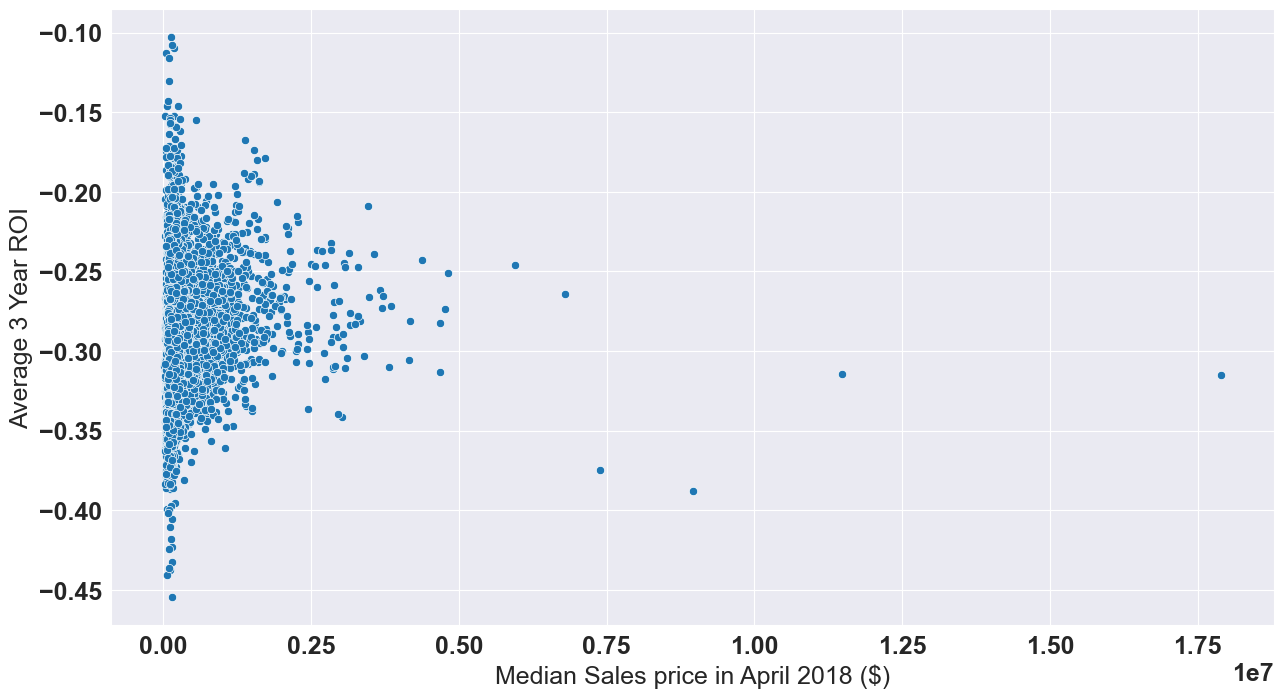

In [118]:
# Plotting median home price versus avg ROI. Some crazy 20 million dollar home values in New York.
sns.scatterplot(data=zillow_df, x='2018-04', y='avg_1_yr_ROI')
plt.xlabel('Median Sales price in April 2018 ($)')
plt.ylabel('Average 3 Year ROI')
plt.savefig('visualizations/median_price_vs_3_year_average.png');

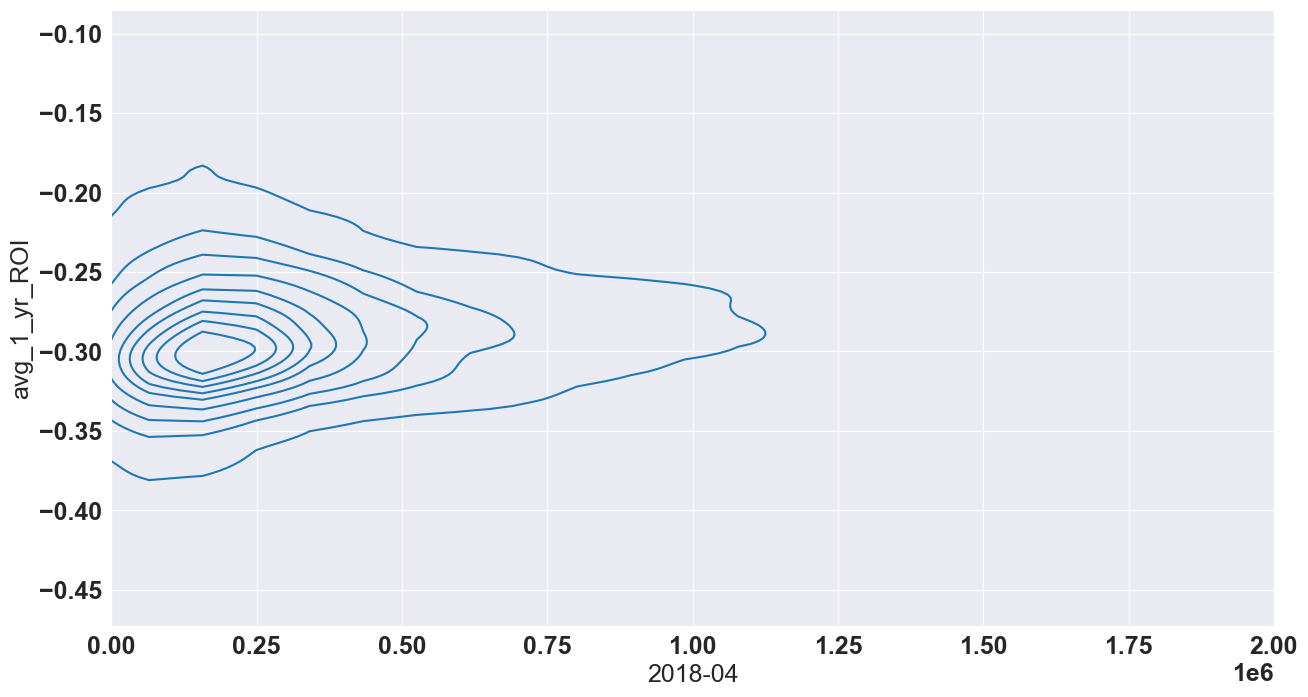

In [119]:

# kdeplot to look for outliers
sns.kdeplot(data=zillow_df, x='2018-04', y='avg_1_yr_ROI', legend = True)
plt.xlim(0,2000000);

The presence of outliers can be seen from the scatter and kdeplot. It maybe necessary to see if these values are valid or not. From [Median Home Prices](https://www.bankrate.com/real-estate/median-home-price/#median-price-by-state) the typical highest value for house prices by state is approx. $750,000.  
We can also consider that there maybe afew high-end luxury houses, mansions and pentehouses e.t.c with the rich the class of the society at that time could afford.

# Multivariate analysis:
looking for the correlation between the Return On Investemetn among the different periods.

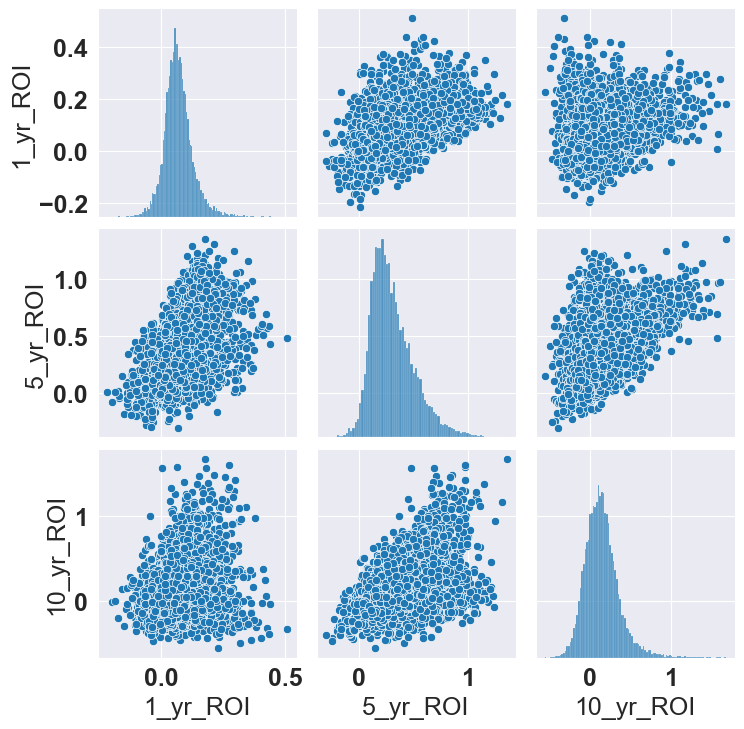

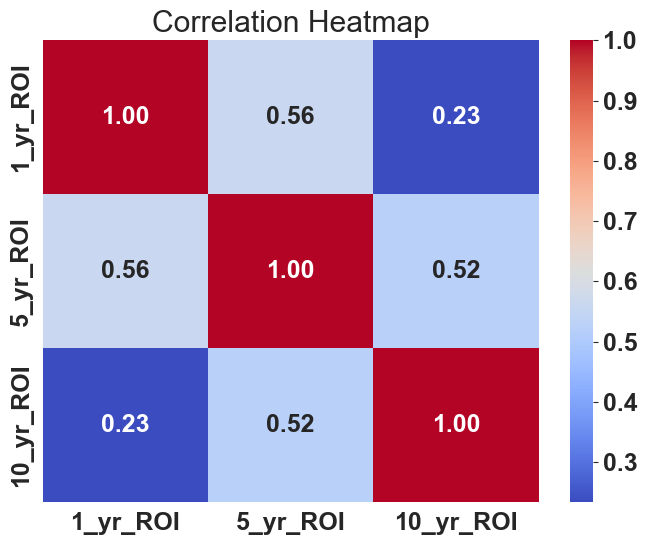

In [120]:
# Pairplot to visualize relationships
sns.pairplot(zillow_df[['1_yr_ROI', '5_yr_ROI', '10_yr_ROI']])

# Heatmap to visualize the correlation between ROI in the different periods
correlation_matrix = zillow_df[['1_yr_ROI', '5_yr_ROI', '10_yr_ROI']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# VISUALIZING TIME SERIES PLOTS ARIMA MODELING
We can first start modelling the various zipcodes that had the highest one year avergae of sales.

In [121]:
def melt_df(df):
    # column name for date information
    melt = pd.melt(df, id_vars=['RegionID', 'RegionName','CountyName', '1_yr_ROI', '5_yr_ROI', '10_yr_ROI', 'avg_1_yr_ROI'], var_name='Date', value_name='value')
    
    # 'Date' column is converted to datetime format
    melt['Date'] = pd.to_datetime(melt['Date'], errors='coerce',format='%Y-%m' )  
    
    # Drop rows with missing date and values
    melt = melt.dropna(subset=['Date','value'])  
    return melt


# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs
def stationarity_check(TS):
    """Calculate rolling statistics and plot against original time series, perform and output Dickey Fuller test."""
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=24, center=False).mean()
    roll_std = TS.rolling(window=24, center=False).std()
        
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS)
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean.dropna(), color='red', label='Rolling Mean')
    plt.plot(roll_std.dropna(), color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig('visualizations/rolling.png')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

# make the data stationary 
def first_order_differencing(ts):
    # Calculate first-order differences
    
    ts['first_difference'] = ts.diff()

    # print(" First Order Difference======")
    # plt.plot(ts.index, ts['first_difference'])
    # plt.axhline(y=0, color='r', linestyle='--', label='Mean')
    # plt.xlabel('Date')
    # plt.ylabel('First Difference of Median Housing Price')
    # plt.title('First Difference of Median Housing Price Over Time')
    # plt.legend()
    # plt.show()
    # print(ts)
    return ts['first_difference']


Checking and dealing with stationarity, seasonality and detrending the top 5 zipcodes.

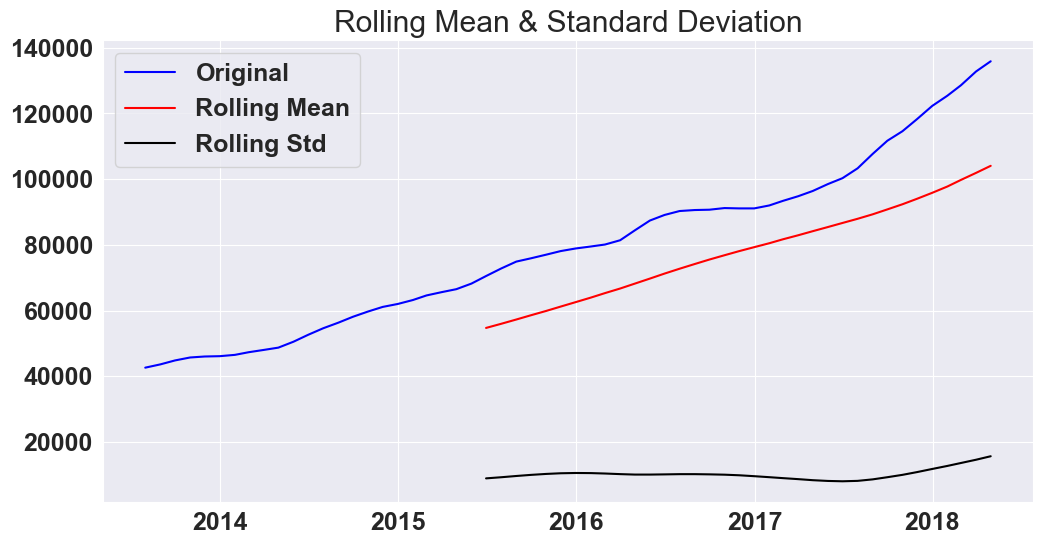

Results of Dickey-Fuller Test: 

Test Statistic                  1.491405
p-value                         0.997492
#Lags Used                      4.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


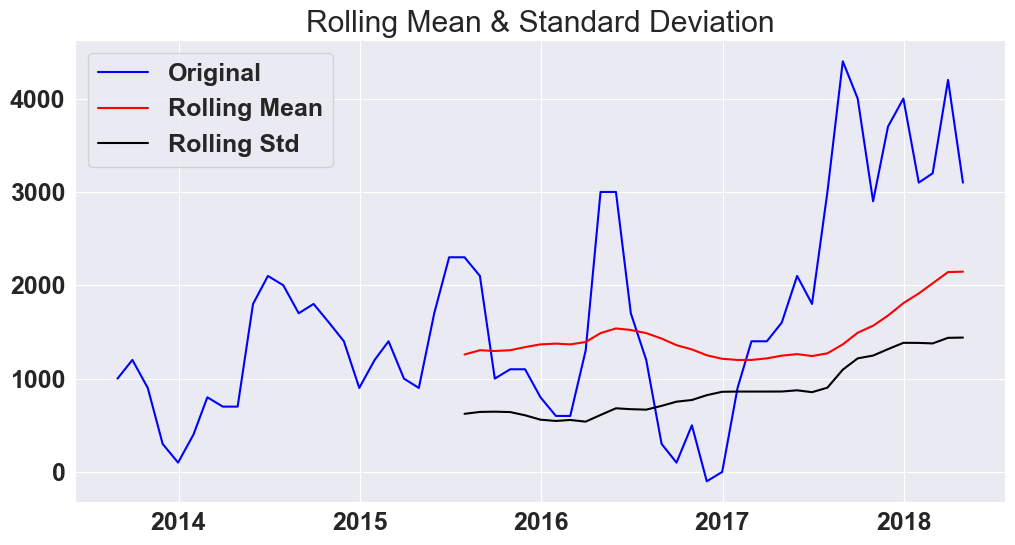

Results of Dickey-Fuller Test: 

Test Statistic                 -2.473593
p-value                         0.122032
#Lags Used                      3.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [122]:
# obtaining the melted df of the Newark zipcode 30032
mcafee_df = zillow_df[zillow_df['RegionName'] == 30032]
mcafee_melted_df = melt_df(mcafee_df)

mcafee_melted_df.set_index('Date', inplace=True)

# transform to a time series object
mcafee_ts = pd.Series(mcafee_melted_df['value']).astype('int')

# downsample the time series data to reduce granularity
mcafee_downsampled_ts = mcafee_ts.resample('M').sum()

stationarity_check(mcafee_downsampled_ts)

# 
mcafee_melted_differenced_ts = first_order_differencing(mcafee_downsampled_ts)
mcafee_melted_differenced_ts.dropna(inplace=True)

# 
stationarity_check(mcafee_melted_differenced_ts)

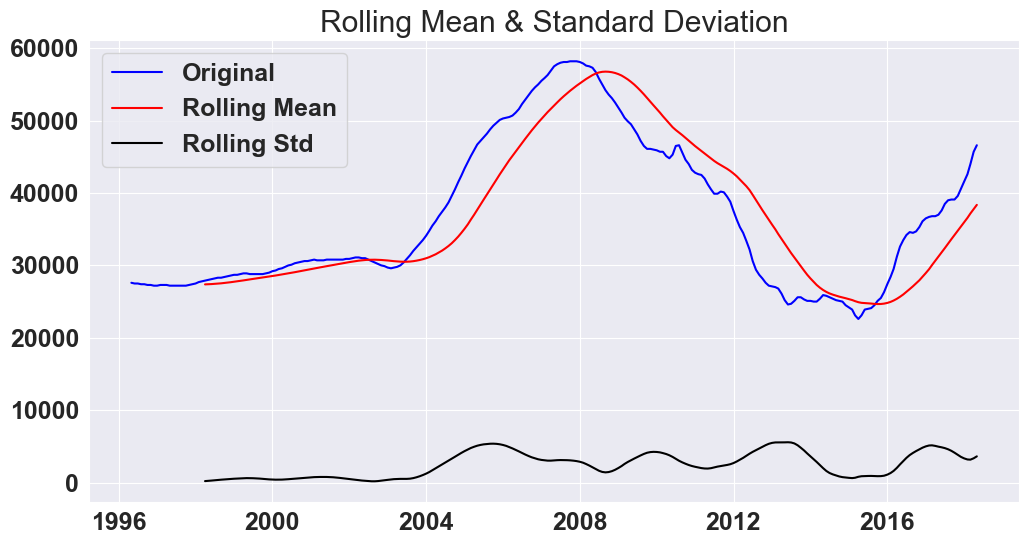

Results of Dickey-Fuller Test: 

Test Statistic                  -2.306207
p-value                          0.169974
#Lags Used                      15.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


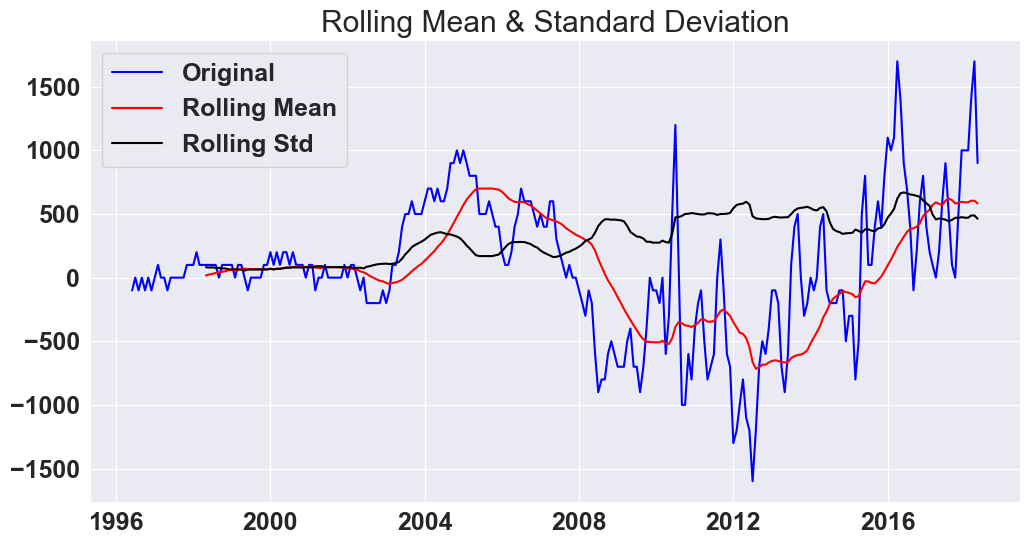

Results of Dickey-Fuller Test: 

Test Statistic                  -2.422182
p-value                          0.135573
#Lags Used                       8.000000
Number of Observations Used    255.000000
Critical Value (1%)             -3.456257
Critical Value (5%)             -2.872942
Critical Value (10%)            -2.572846
dtype: float64


In [123]:
# obtaining the melted df of the Philaedaphia zipcode 19134
herford_df = zillow_df[zillow_df['RegionName'] == 19134]
hertford_melted_df = melt_df(herford_df)

hertford_melted_df.set_index('Date', inplace=True)

# transform to a time series object
hertford_ts = pd.Series(hertford_melted_df['value']).astype('int')

# downsample the time series data to reduce granularity
hertford_downsampled_ts = hertford_ts.resample('M').sum()

stationarity_check(hertford_downsampled_ts)

# 
hertford_melted_differenced_ts = first_order_differencing(hertford_downsampled_ts)
hertford_melted_differenced_ts.dropna(inplace=True)

# 
stationarity_check(hertford_melted_differenced_ts)



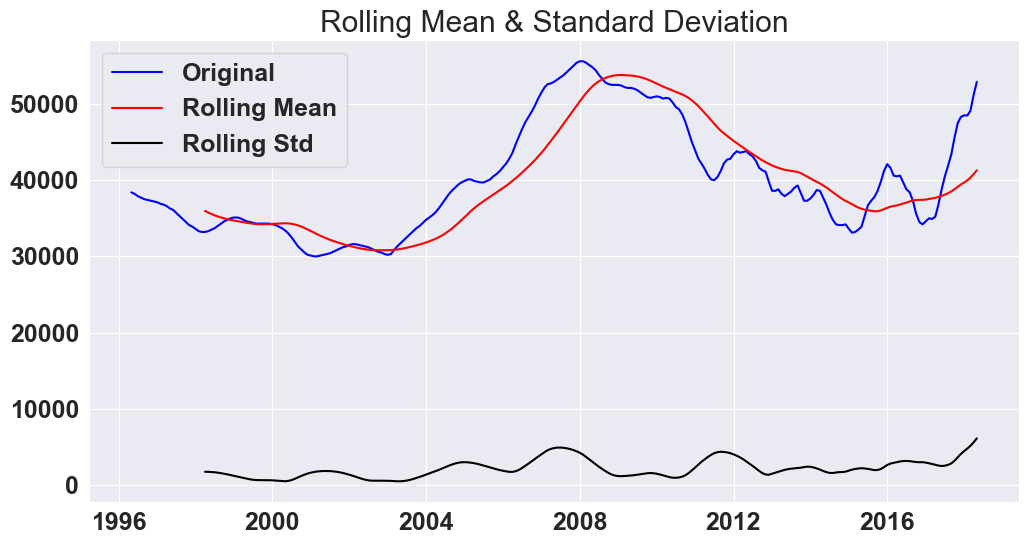

Results of Dickey-Fuller Test: 

Test Statistic                  -1.632232
p-value                          0.466323
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


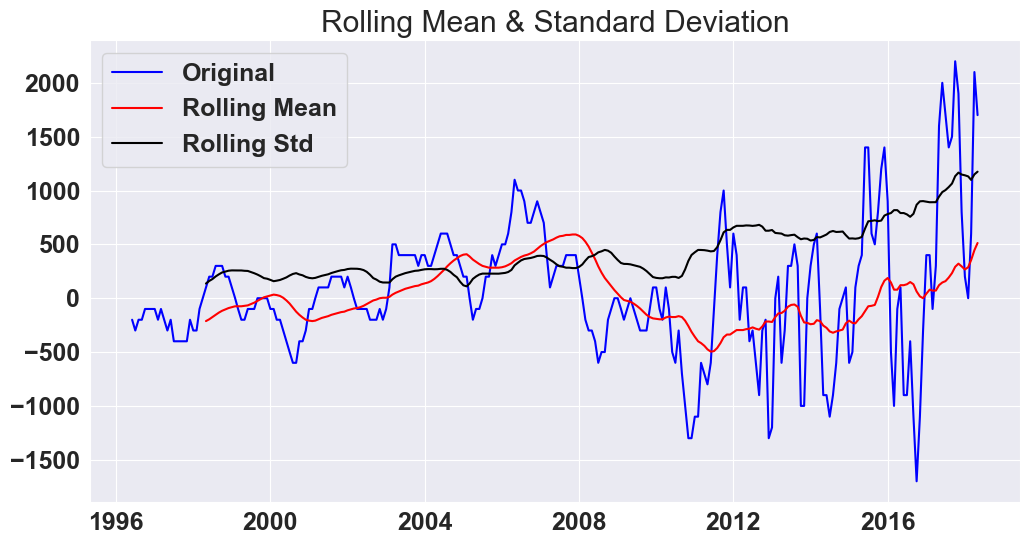

Results of Dickey-Fuller Test: 

Test Statistic                  -1.826221
p-value                          0.367523
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [124]:
# obtaining the melted df of the Newark zipcode 19601
newark_df = zillow_df[zillow_df['RegionName'] == 19601]
newark_melted_df = melt_df(newark_df)

newark_melted_df.set_index('Date', inplace=True)

# transform to a time series object
newark_ts = pd.Series(newark_melted_df['value']).astype('int')

# downsample the time series data to reduce granularity
newark_downsampled_ts = newark_ts.resample('M').sum()

stationarity_check(newark_downsampled_ts)

# 
newark_melted_differenced_ts = first_order_differencing(newark_downsampled_ts)
newark_melted_differenced_ts.dropna(inplace=True)

# 
stationarity_check(newark_melted_differenced_ts)

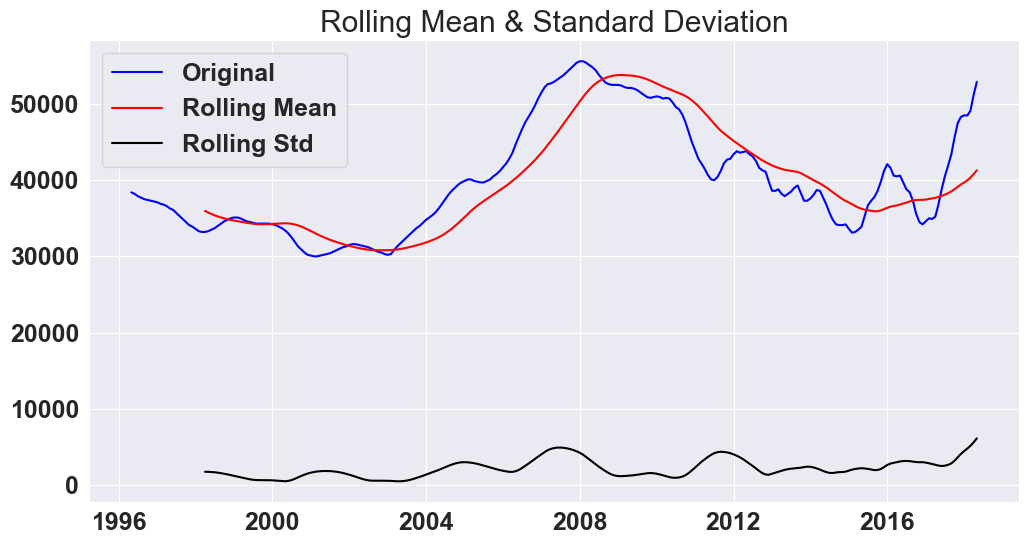

Results of Dickey-Fuller Test: 

Test Statistic                  -1.632232
p-value                          0.466323
#Lags Used                      16.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


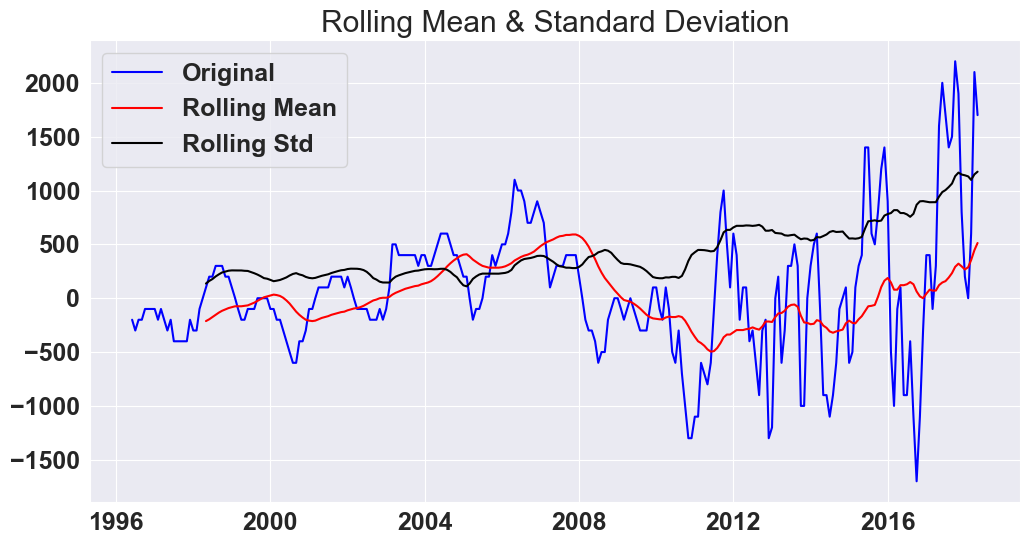

Results of Dickey-Fuller Test: 

Test Statistic                  -1.826221
p-value                          0.367523
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [125]:
# obtaining the melted df of the Philaedaphia zipcode 19134
philly_df = zillow_df[zillow_df['RegionName'] == 19134]
philly_melted_df = melt_df(newark_df)

philly_melted_df.set_index('Date', inplace=True)

# transform to a time series object
philly_ts = pd.Series(philly_melted_df['value']).astype('int')

# downsample the time series data to reduce granularity
philly_downsampled_ts = philly_ts.resample('M').sum()

stationarity_check(philly_downsampled_ts)

# 
philly_melted_differenced_ts = first_order_differencing(philly_downsampled_ts)
philly_melted_differenced_ts.dropna(inplace=True)

# 
stationarity_check(philly_melted_differenced_ts)

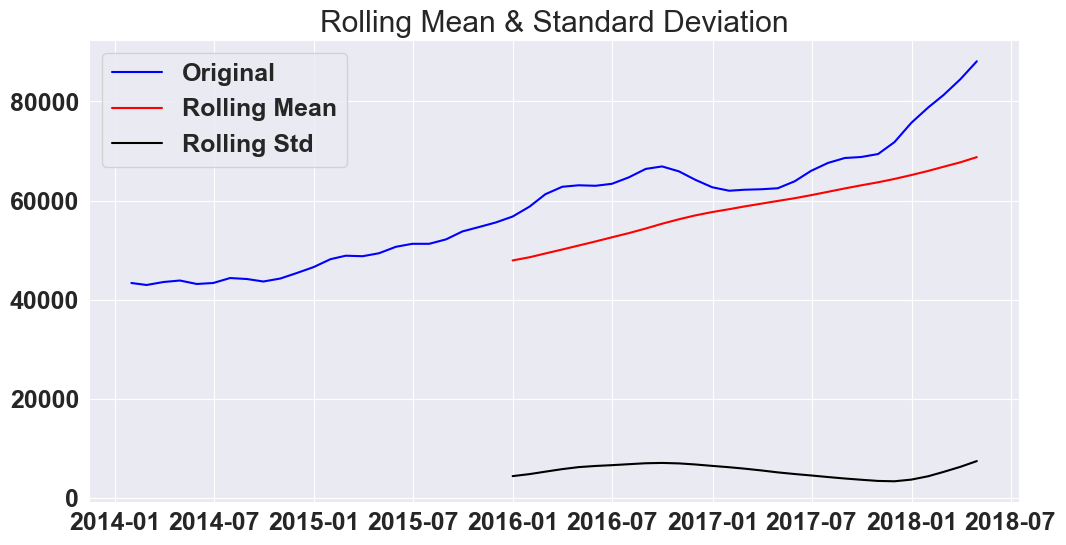

Results of Dickey-Fuller Test: 

Test Statistic                  0.877878
p-value                         0.992795
#Lags Used                      6.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


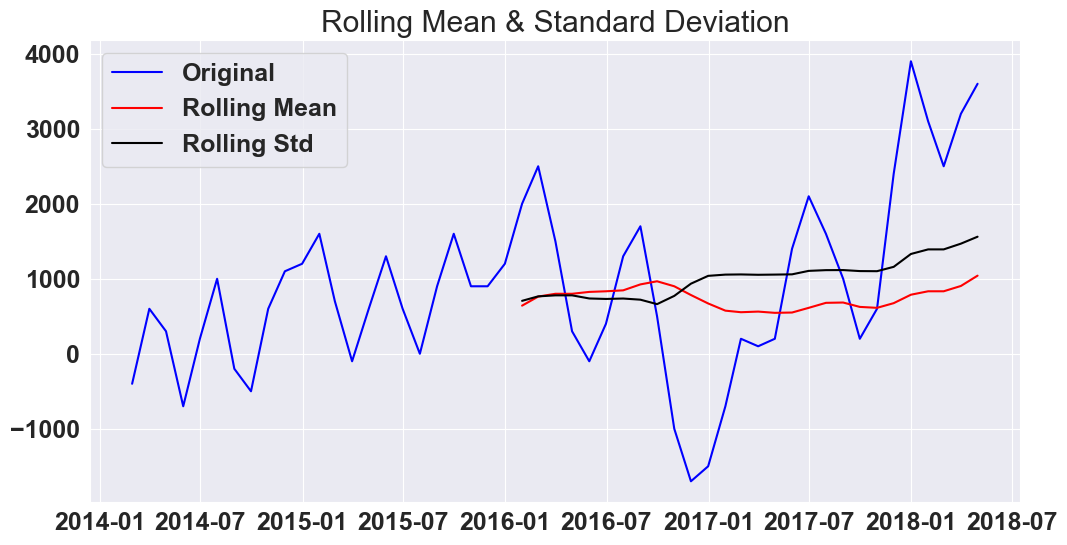

Results of Dickey-Fuller Test: 

Test Statistic                 -1.004437
p-value                         0.751643
#Lags Used                      5.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   51
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -408.848
Date:                Sat, 23 Sep 2023   AIC                            823.695
Time:                        19:00:26   BIC                            829.491
Sample:                    02-28-2014   HQIC                           825.910
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
                 coef    std err 

NameError: name 'predicted_values' is not defined

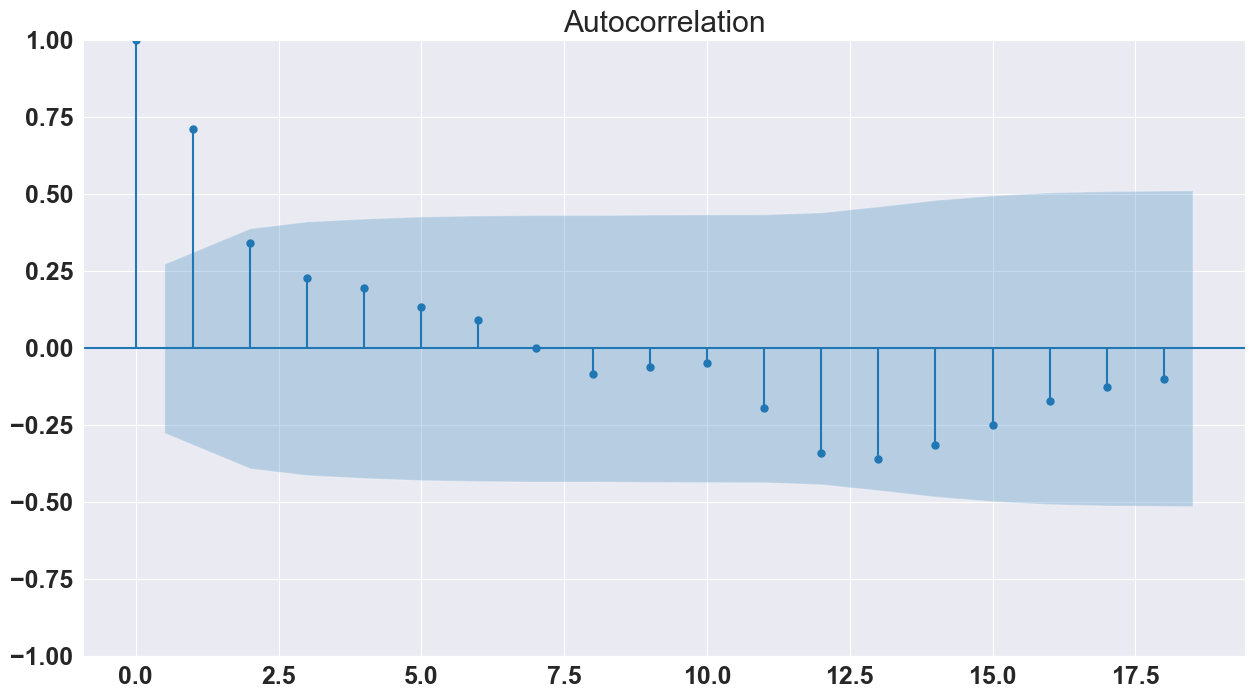

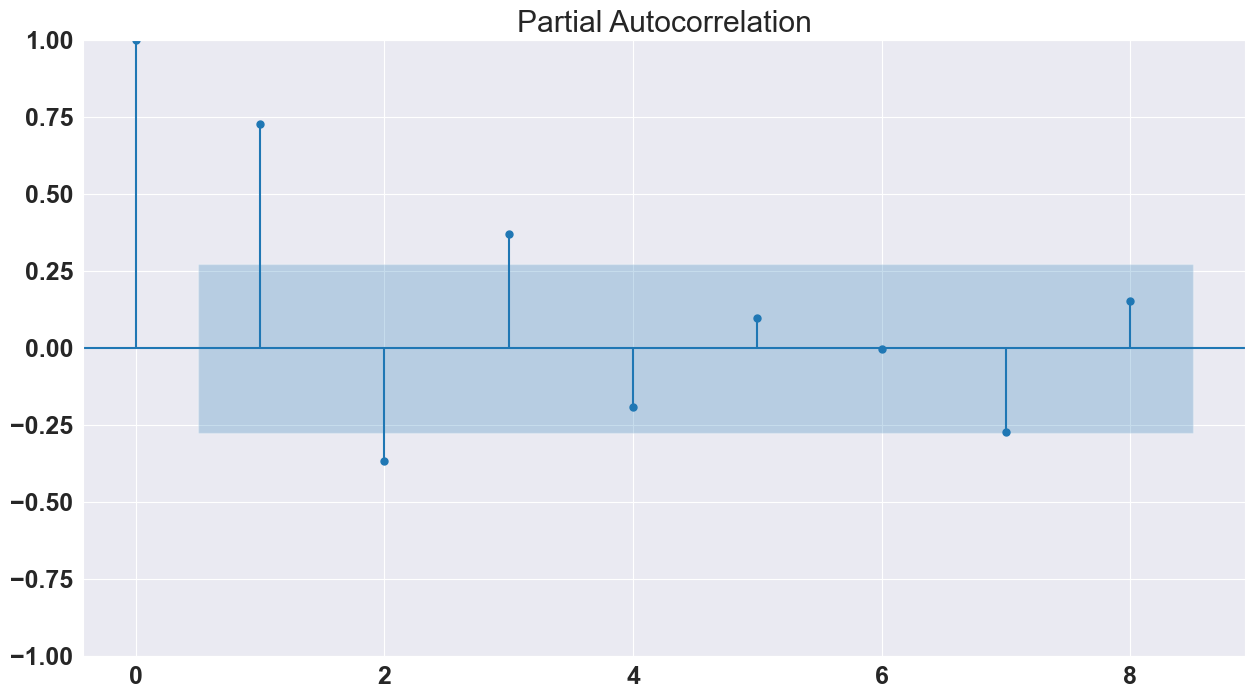

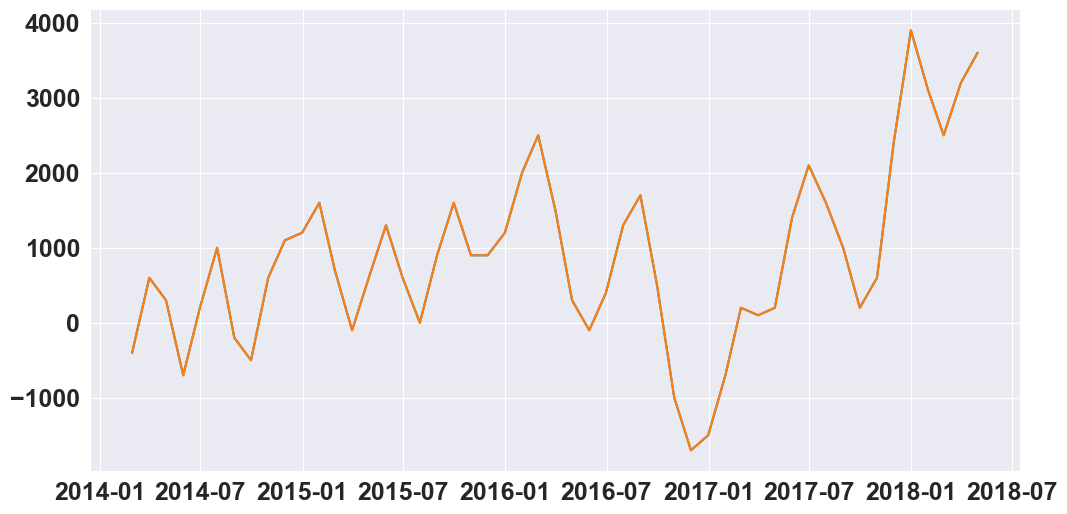

In [139]:
# obtaining the melted df of the Columbus zipcode 19134
columbus_df = zillow_df[zillow_df['RegionName'] == 43206]
columbus_melted_df = melt_df(columbus_df)

columbus_melted_df.set_index('Date', inplace=True)

# transform to a time series object
columbus_ts = pd.Series(columbus_melted_df['value']).astype('int')

# downsample the time series data to reduce granularity
columbus_downsampled_ts = columbus_ts.resample('M').sum()

stationarity_check(columbus_downsampled_ts)

# 
columbus_melted_differenced_ts = first_order_differencing(columbus_downsampled_ts)
columbus_melted_differenced_ts.dropna(inplace=True)

# 
stationarity_check(columbus_melted_differenced_ts)


# plot ACF 
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
plot_acf(columbus_melted_differenced_ts);
# Plot the PACF
plot_pacf(columbus_melted_differenced_ts,lags=8);


# fit an MA model
columbus_ma_model = ARIMA(columbus_melted_differenced_ts, order=(0,0,1))
columbus_res = columbus_ma_model.fit()
print(columbus_res.summary())

# fit an AR model
columbus_ar_model = ARIMA(columbus_melted_differenced_ts, order=(1,0,0))
columbus_res = columbus_ar_model.fit()
print(columbus_res.summary())


columbus_arma_model = ARIMA(columbus_melted_differenced_ts, order=(1,0,1))
columbus_res = columbus_ar_model.fit()
print(columbus_res.summary())

# fit an ARIMA model
columbus_arima_model  = ARIMA(columbus_melted_differenced_ts, order=(1,1,1))
columbus_res = columbus_arima_model.fit()
print(columbus_res.summary())



# columbus_model.plot_predict(start=1, end=24, exog=None,dynamic=False)
# plt.show()

#predicted values from the ARIMA model
# predicted_values = columbus_arima_model.predict(typ='levels')

# Creating a time index for the original series
time_index = columbus_melted_differenced_ts.index

# Plotting the original series and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, columbus_melted_differenced_ts, label='Original Series')
plt.plot(time_index,columbus_melted_differenced_ts, label='Differenced Series')
plt.plot(time_index, predicted_values, label='Predicted Values', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA(1,1,1) Model Predictions')
plt.legend()
plt.show()





# Trimming the data to align lengths
columbus_melted_differenced_ts = columbus_melted_differenced_ts[1:]

# Ensuring that predicted_columbus have the same length
predicted_columbus = columbus_melted_differenced_ts[:len(columbus_melted_differenced_ts)]




# Calculating MAE and MSE
mae = mean_absolute_error(columbus_melted_differenced_ts, predicted_columbus)
mse = mean_squared_error(columbus_melted_differenced_ts, predicted_columbus)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

# INTERPRETING RESULTS

# CONCLUSION